In [83]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [84]:
df = pd.read_excel('flights.xlsx')


In [85]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3898
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7663
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13883
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6219
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13303


In [86]:
df.shape

(10683, 11)

In [88]:
df.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional Info', 'Price'],
      dtype='object')

In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


**Convert dtype of Date_of_Journay, Dep_Time and Arrival_Time to DateTime type**

In [90]:
###convert time to DateTime type
df['Date_of_Journey']=pd.to_datetime(df['Date_of_Journey'])
df['Dep_Time']=pd.to_datetime(df['Dep_Time'])
df['Arrival_Time']=pd.to_datetime(df['Arrival_Time'])

In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Airline          10683 non-null  object        
 1   Date_of_Journey  10683 non-null  datetime64[ns]
 2   Source           10683 non-null  object        
 3   Destination      10683 non-null  object        
 4   Route            10682 non-null  object        
 5   Dep_Time         10683 non-null  datetime64[ns]
 6   Arrival_Time     10683 non-null  datetime64[ns]
 7   Duration         10683 non-null  object        
 8   Total_Stops      10682 non-null  object        
 9   Additional Info  10683 non-null  object        
 10  Price            10683 non-null  int64         
dtypes: datetime64[ns](3), int64(1), object(7)
memory usage: 918.2+ KB


In [92]:
#divide years, months, days of datetime dtype
df['journey_year']=df['Date_of_Journey'].dt.year
df['journey_month']=df['Date_of_Journey'].dt.month
df['journey_day']=df['Date_of_Journey'].dt.day

In [93]:
#drop Date_of_Journey
df.drop(['Date_of_Journey'], axis=1, inplace=True)

In [94]:
#divide dep_time to two columns: hr and min 
df['dep_hour']=df['Dep_Time'].dt.hour
df['dep_min']=df['Dep_Time'].dt.minute

In [95]:
#drop Dep_time
df.drop(['Dep_Time'], axis=1, inplace=True)

In [96]:
###devide arrival date
df['arrival_year']=df['Arrival_Time'].dt.year
df['arrival_month']=df['Arrival_Time'].dt.month
df['arrival_day']=df['Arrival_Time'].dt.day

In [97]:
##devide arrival time 
df['arrival_hour']=df['Arrival_Time'].dt.hour
df['arrival_min']=df['Arrival_Time'].dt.minute

In [98]:
#drop Arrival_Time
df.drop(['Arrival_Time'], axis=1, inplace=True)

In [99]:
#divide Duration to two columns: hours and mins
duration = list(df["Duration"]) #list Duration so we can spply split() and referencec it 
duration_hours = [] #create empty lists to append later with values from Duration
duration_mins = []



for i in range(len(duration)):
    duration_hours.append(duration[i].split(sep = "h")[0])
    duration_mins.append(duration[i].split(sep = "m")[0].split()[-1])

In [100]:
#adding duration_hours and duration_mins to df
df['duration_hours']=duration_hours
df['duration_mins']=duration_mins

In [101]:
#drop Duration
df.drop(['Duration'], axis=1, inplace=True)

In [102]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Source           10683 non-null  object
 2   Destination      10683 non-null  object
 3   Route            10682 non-null  object
 4   Total_Stops      10682 non-null  object
 5   Additional Info  10683 non-null  object
 6   Price            10683 non-null  int64 
 7   journey_year     10683 non-null  int64 
 8   journey_month    10683 non-null  int64 
 9   journey_day      10683 non-null  int64 
 10  dep_hour         10683 non-null  int64 
 11  dep_min          10683 non-null  int64 
 12  arrival_year     10683 non-null  int64 
 13  arrival_month    10683 non-null  int64 
 14  arrival_day      10683 non-null  int64 
 15  arrival_hour     10683 non-null  int64 
 16  arrival_min      10683 non-null  int64 
 17  duration_hours   10683 non-null

**Handling null values**

In [103]:
#check for null values
df.isnull().sum()

Airline            0
Source             0
Destination        0
Route              1
Total_Stops        1
Additional Info    0
Price              0
journey_year       0
journey_month      0
journey_day        0
dep_hour           0
dep_min            0
arrival_year       0
arrival_month      0
arrival_day        0
arrival_hour       0
arrival_min        0
duration_hours     0
duration_mins      0
dtype: int64

In [104]:
#check the instance with NaN
df1 = df[df.isna().any(axis=1)]
df1

,Airline,Source,Destination,Route,Total_Stops,Additional Info,Price,journey_year,journey_month,journey_day,dep_hour,dep_min,arrival_year,arrival_month,arrival_day,arrival_hour,arrival_min,duration_hours,duration_mins
9039,Air India,Delhi,Cochin,NaN,NaN,No info,7481,2019,6,5,9,45,2022,5,7,9,25,23,40


In [105]:
#drop the instance with NaN
df.dropna(inplace=True)

In [106]:
#renaming Additional Info column to be able to access .value_counts()
df.rename({'Additional Info': 'additional_info'}, axis=1, inplace=True)

In [107]:
#the feature [additional_info] contains 'No info' which counts as nulls 
df.additional_info.value_counts()


No info                         8344
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
1 Short layover                    1
Red-eye flight                     1
2 Long layover                     1
Name: additional_info, dtype: int64

In [108]:
#since 'No info' represent approximately 76% of the column and it appears to be missing at random, but we're waiting for more info. 
#meanwhile, we'll keep it but will not include it in the training set


**'Route' column**

In [109]:
#Route contains the name of cities and the number of stops. This info is already given in the Total_Stops and Destination and Source columns
#thus, we will drop Route
df.drop(['Route'], axis=1, inplace=True)

**Check for duplicates**

In [110]:
#check for duplicates
df.duplicated().value_counts()

False    10462
True       220
dtype: int64

In [111]:
#view duplicated rows
df[df.duplicated()]

,Airline,Source,Destination,Total_Stops,additional_info,Price,journey_year,journey_month,journey_day,dep_hour,dep_min,arrival_year,arrival_month,arrival_day,arrival_hour,arrival_min,duration_hours,duration_mins
683,Jet Airways,Delhi,Cochin,2 stops,No info,13377,2019,1,6,14,35,2022,6,2,4,25,13,50
1061,Air India,Delhi,Cochin,2 stops,No info,10232,2019,5,21,22,0,2022,5,22,19,15,21,15
1348,Air India,Delhi,Cochin,2 stops,No info,12393,2019,5,18,17,15,2022,5,19,19,15,26,26h
1418,Jet Airways,Delhi,Cochin,2 stops,In-flight meal not included,10369,2019,6,6,5,30,2022,6,7,4,25,22,55
1674,IndiGo,Banglore,New Delhi,non-stop,No info,7304,2019,3,24,18,25,2022,2,15,21,20,2,55
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10594,Jet Airways,Delhi,Cochin,2 stops,No info,12820,2019,6,27,23,5,2022,6,28,12,35,13,30
10616,Jet Airways,Delhi,Cochin,2 stops,No info,13015,2019,1,6,9,40,2022,6,2,12,35,26,55
10634,Jet Airways,Delhi,Cochin,2 stops,In-flight meal not included,11734,2019,6,6,9,40,2022,6,7,12,35,26,55
10672,Jet Airways,Delhi,Cochin,2 stops,In-flight meal not included,11151,2019,6,27,23,5,2022,6,28,19,0,19,55


In [112]:
#drop duplicated rows
df.drop_duplicates(keep='first',inplace=True)

**Feature Engineering**

Define a function to return arrival and departure hours as parts of the day

In [113]:
#define hours of the day
def ptday(x):
    if x>=00 and x<=4:
        return 'late night'
    elif x>4 and x<=8:
        return 'early morning'
    elif x>8 and x<=12:
        return 'morning'
    elif x>12 and x<=16:
        return 'After noon'
    elif x>16 and x<=20:
        return'evening'
    elif x>20 and x<=23:
        return 'night'

In [114]:
#apply the function to arrival hours and departure hours
df['arrival_time']=df['arrival_hour'].apply(ptday)
df['departure_time']=df['dep_hour'].apply(ptday)

In [115]:
df.sample(2)

,Airline,Source,Destination,Total_Stops,additional_info,Price,journey_year,journey_month,journey_day,dep_hour,dep_min,arrival_year,arrival_month,arrival_day,arrival_hour,arrival_min,duration_hours,duration_mins,arrival_time,departure_time
8044,IndiGo,Kolkata,Banglore,non-stop,No info,4463,2019,3,18,15,10,2022,2,15,17,45,2,35,evening,After noon
2505,Air India,Delhi,Cochin,1 stop,No info,8373,2019,12,6,21,0,2022,6,13,7,40,10,40,early morning,night


In [116]:
df.columns

Index(['Airline', 'Source', 'Destination', 'Total_Stops', 'additional_info',
       'Price', 'journey_year', 'journey_month', 'journey_day', 'dep_hour',
       'dep_min', 'arrival_year', 'arrival_month', 'arrival_day',
       'arrival_hour', 'arrival_min', 'duration_hours', 'duration_mins',
       'arrival_time', 'departure_time'],
      dtype='object')

**Renaming columns**

In [117]:
df.rename(columns={'Airline': "airline", 'Source':'embarked', 'Destination':'destination','Price':'price','Total_Stops':'stops'}, inplace=True)

**Rearranging columns**

In [118]:
df = df[['airline','embarked', 'destination', 'stops','journey_year', 'journey_month', 'journey_day','dep_hour', 'dep_min', 'departure_time', 'arrival_year','arrival_month','arrival_day','arrival_hour', 'arrival_min', 'arrival_time', 'price', 'additional_info']]

# Data Viz

In [119]:
# Making Sure the data is still intact
df.shape

(10462, 18)

In [120]:
# Getting a look at the airlines, to see if some airline is over repsented which could lead to bias
df.airline.value_counts()

Jet Airways                          3700
IndiGo                               2043
Air India                            1694
Multiple carriers                    1196
SpiceJet                              815
Vistara                               478
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: airline, dtype: int64

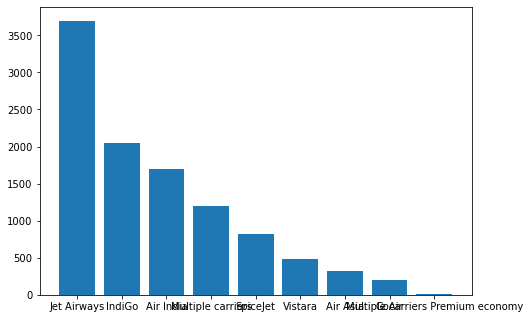

In [121]:
# Visualize what did
AL  = df['airline'].value_counts()
AL = AL[:9,]
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(AL.index,AL.values)
plt.show()

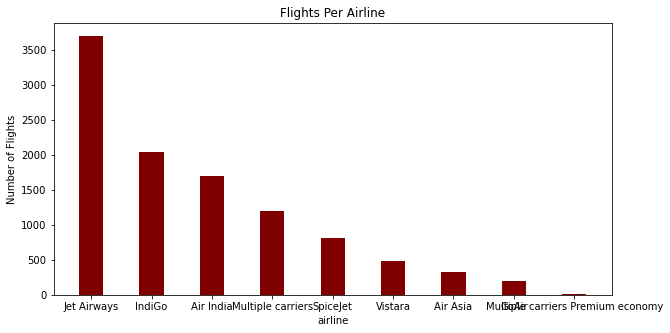

In [122]:
fig = plt.figure(figsize = (10, 5))
AL  = df['airline'].value_counts()
AL = AL[:9,]
# creating the bar plot
plt.bar(AL.index, AL.values, color ='maroon',
        width = 0.4)
 
plt.xlabel('airline')
plt.ylabel('Number of Flights')
plt.title('Flights Per Airline')
plt.show()

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


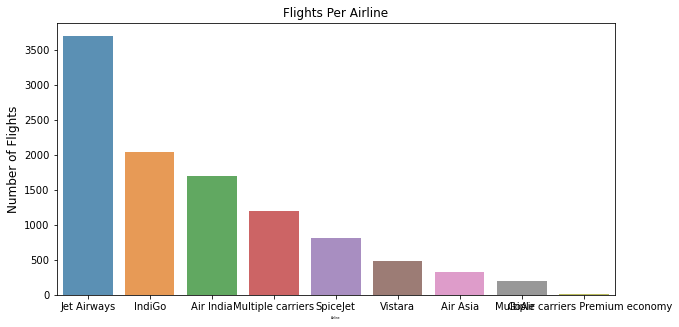

In [123]:
AL  = df['airline'].value_counts()
AL = AL[:9,]
plt.figure(figsize=(10,5))
sns.barplot(AL.index, AL.values, alpha=0.8)
plt.title('Flights Per Airline')
plt.ylabel('Number of Flights', fontsize=12)
plt.xlabel('Airline', fontsize=3)
plt.show()